In [1]:
import numpy as np
import scipy.linalg
from scipy.stats import ortho_group
from scipy.io import loadmat
from localizer import Localizer
import psi4

#https://github.com/molmod/molmod
from molmod.units import angstrom, debye

import matplotlib.pyplot as plt

#importing the QM7 database
data = dict(loadmat('qm7.mat'))
Z = data['Z'] # numbers
R = data['R']/angstrom # positions in angstrom

# Molecule order: H2O,CO2,HCN,Acetonitrile,H2SO4,Benzene,Diborane
numbers = np.load('nuclei_numbers.npy')
positions = np.load('positions.npy')

## Generating data

In [2]:
quad_loc = np.zeros((6,9))
quad = np.zeros((6,9))
scheme = 'PM'
for i in range(6):
    loc = Localizer(numbers[i],positions[i])
    loc.set_scheme(scheme)
    conv = loc.optimize_line_search(nsteps=1000, psi4_guess=True)
    if not conv:
        print('rerunning')
        loc.optimize_line_search(nsteps=1000, psi4_guess=False)
    loc.compare_quadrupole()
    quad_loc[i] = loc.total_loc_quadrupole.flatten()
    quad[i] = loc.total_quadrupole.flatten()
np.save('benchmarking/_' + scheme + '_quad.npy', quad)
np.save('benchmarking/_' + scheme + '_quad_loc.npy', quad_loc)

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_


In [11]:
N = 50
quad_loc_qm7 = np.zeros((N,9))
quad_qm7 = np.zeros((N,9))
scheme = 'V3'
for i in range(N):
    loc = Localizer(Z[i],R[i],i)
    loc.set_scheme(scheme)
    conv = loc.optimize_line_search(nsteps=1000, psi4_guess=True)
    if not conv:
        print('rerunning')
        loc.optimize_line_search(nsteps=1000, psi4_guess=False)
    loc.compare_quadrupole()
    quad_loc_qm7[i] = loc.total_loc_quadrupole.flatten()
    quad_qm7[i] = loc.total_quadrupole.flatten()
np.save('benchmarking/' + scheme + '_qm7_quad.npy', quad_qm7)
np.save('benchmarking/' + scheme + '_qm7_quad_loc.npy', quad_loc_qm7)

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: no

### Generating additional data

In [106]:
N = 25
scheme = 'V3'
quad_qm7 = np.load('benchmarking/' + scheme + '_qm7_quad.npy')
quad_loc_qm7 = np.load('benchmarking/' + scheme + '_qm7_quad_loc.npy')
for i in range(len(quad_qm7), len(quad_qm7) + N):
    loc = Localizer(Z[i],R[i],i)
    loc.set_scheme(scheme)
    conv = loc.optimize_line_search(nsteps=1000, psi4_guess=True)
    if not conv:
        print('rerunning')
        loc.optimize_line_search(nsteps=1000, psi4_guess=False)
    loc.compare_quadrupole()
    quad_loc_qm7 = np.append(quad_loc_qm7, [loc.total_loc_quadrupole.flatten()], axis=0)
    quad_qm7 = np.append(quad_qm7, [loc.total_quadrupole.flatten()], axis=0)
np.save('benchmarking/' + scheme + '_qm7_quad.npy', quad_qm7)
np.save('benchmarking/' + scheme + '_qm7_quad_loc.npy', quad_loc_qm7)

Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
No convergence!
rerunning
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-311ppg_d_p_
Convergence: norm of riemann gradient below 10^-5
Psi4 Model initiated with method scf and basis set 6-3

In [107]:
np.shape(quad_loc_qm7)

(100, 9)

In [108]:
np.shape(quad_qm7)

(100, 9)

In [72]:
quad_qm7 = quad_qm7[:64]
quad_loc_qm7 = quad_loc_qm7[:64]

In [74]:
np.save('benchmarking/V3_qm7_quad.npy', quad_qm7)
np.save('benchmarking/V3_qm7_quad_loc.npy', quad_loc_qm7)

## Importing data

In [8]:
quad = np.load('benchmarking/FB_quad.npy')
quad_loc = np.load('benchmarking/FB_quad_loc.npy')

In [10]:
quad = np.load('benchmarking/PM_quad.npy')
quad_loc = np.load('benchmarking/PM_quad_loc.npy')

In [11]:
quad = np.load('benchmarking/V3_quad.npy')
quad_loc = np.load('benchmarking/V3_quad_loc.npy')

In [11]:
quad_qm7 = np.load('benchmarking/FB_qm7_quad.npy')
quad_loc_qm7 = np.load('benchmarking/FB_qm7_quad_loc.npy')

In [9]:
quad_qm7 = np.load('benchmarking/PM_qm7_quad.npy')
quad_loc_qm7 = np.load('benchmarking/PM_qm7_quad_loc.npy')

In [7]:
quad_qm7 = np.load('benchmarking/V3_qm7_quad.npy')
quad_loc_qm7 = np.load('benchmarking/V3_qm7_quad_loc.npy')

## Foster-Boys

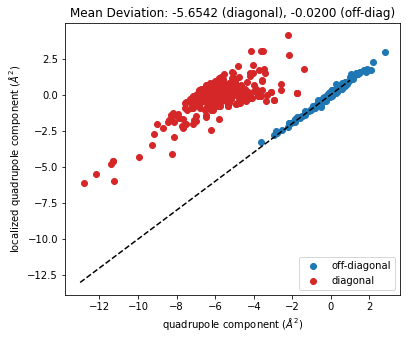

In [12]:
# square_distance = (freqs[0] - freqs[1])**2
# distance = freqs[1]-freqs[0]
# rmsd = np.sqrt(np.mean(square_distance))
# mdev = np.mean(distance)

diag_idx = np.array([])
off_idx = np.array([])
for i in range(int((len(quad_qm7.flatten()))/9)):
    diag_idx = np.append(diag_idx,np.array([0,4,8])+(i*9))
    off_idx = np.append(off_idx,np.array([1,2,5])+(i*9))

diag_diff = quad_qm7.flatten()[diag_idx.astype(int)] - quad_loc_qm7.flatten()[diag_idx.astype(int)]
off_diff = quad_qm7.flatten()[off_idx.astype(int)] - quad_loc_qm7.flatten()[off_idx.astype(int)]

diag_mdev = np.mean(diag_diff)
off_mdev = np.mean(off_diff)

fig, (ax1) = plt.subplots(1,1,figsize=(6,5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-13.,1,int((len(quad_qm7.flatten()))/9))
ax1.plot(x,x, 'k--')
ax1.scatter(quad_qm7.flatten()[off_idx.astype(int)],quad_loc_qm7.flatten()[off_idx.astype(int)],
            marker='o', label='off-diagonal')
ax1.scatter(quad_qm7.flatten()[diag_idx.astype(int)],quad_loc_qm7.flatten()[diag_idx.astype(int)],
            c='C3', marker='o', label='diagonal')
ax1.set(xlabel='quadrupole component ($\AA^2$)',
        ylabel='localized quadrupole component ($\AA^2$)')
ax1.set_title('Mean Deviation: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')
plt.savefig('figures/FB_quadrupole_benchmark_qm7', dpi=1000)

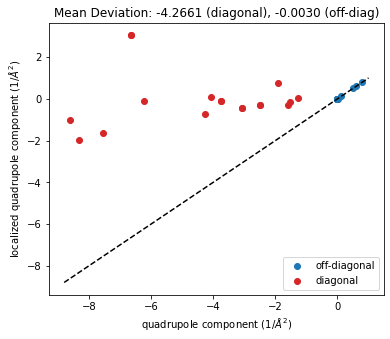

In [8]:
# square_distance = (freqs[0] - freqs[1])**2
# distance = freqs[1]-freqs[0]
# rmsd = np.sqrt(np.mean(square_distance))
# mdev = np.mean(distance)

diag_idx = np.array([])
off_idx = np.array([])
for i in range(int((len(quad.flatten()))/9)):
    diag_idx = np.append(diag_idx,np.array([0,4,8])+(i*9))
    off_idx = np.append(off_idx,np.array([1,2,5])+(i*9))

diag_diff = quad.flatten()[diag_idx.astype(int)] - quad_loc.flatten()[diag_idx.astype(int)]
off_diff = quad.flatten()[off_idx.astype(int)] - quad_loc.flatten()[off_idx.astype(int)]

diag_mdev = np.mean(diag_diff)
off_mdev = np.mean(off_diff)

fig, (ax1) = plt.subplots(1,1,figsize=(6,5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-8.8,1,10)
ax1.plot(x,x, 'k--')
ax1.scatter(quad.flatten()[off_idx.astype(int)],quad_loc.flatten()[off_idx.astype(int)],
            marker='o', label='off-diagonal')
ax1.scatter(quad.flatten()[diag_idx.astype(int)],quad_loc.flatten()[diag_idx.astype(int)],
            c='C3', marker='o', label='diagonal')
ax1.set(xlabel='quadrupole component ($\AA^2$)',
        ylabel='localized quadrupole component ($\AA^2$)')
ax1.set_title('Mean Deviation: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')

## Pipek-Mezey

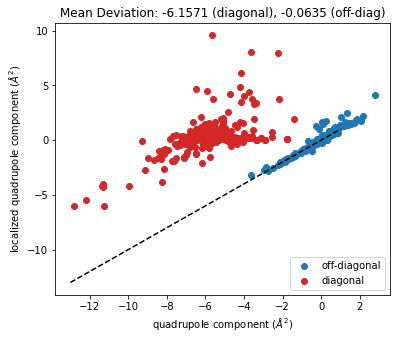

In [10]:
# square_distance = (freqs[0] - freqs[1])**2
# distance = freqs[1]-freqs[0]
# rmsd = np.sqrt(np.mean(square_distance))
# mdev = np.mean(distance)

diag_idx = np.array([])
off_idx = np.array([])
for i in range(int((len(quad_qm7.flatten()))/9)):
    diag_idx = np.append(diag_idx,np.array([0,4,8])+(i*9))
    off_idx = np.append(off_idx,np.array([1,2,5])+(i*9))

diag_diff = quad_qm7.flatten()[diag_idx.astype(int)] - quad_loc_qm7.flatten()[diag_idx.astype(int)]
off_diff = quad_qm7.flatten()[off_idx.astype(int)] - quad_loc_qm7.flatten()[off_idx.astype(int)]

diag_mdev = np.mean(diag_diff)
off_mdev = np.mean(off_diff)

fig, (ax1) = plt.subplots(1,1,figsize=(6,5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-13.,1,int((len(quad_qm7.flatten()))/9))
ax1.plot(x,x, 'k--')
ax1.scatter(quad_qm7.flatten()[off_idx.astype(int)],quad_loc_qm7.flatten()[off_idx.astype(int)],
            marker='o', label='off-diagonal')
ax1.scatter(quad_qm7.flatten()[diag_idx.astype(int)],quad_loc_qm7.flatten()[diag_idx.astype(int)],
            c='C3', marker='o', label='diagonal')
ax1.set(xlabel='quadrupole component ($\AA^2$)',
        ylabel='localized quadrupole component ($\AA^2$)')
ax1.set_title('Mean Deviation: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')
plt.savefig('figures/PM_quadrupole_benchmark_qm7', dpi=1000)

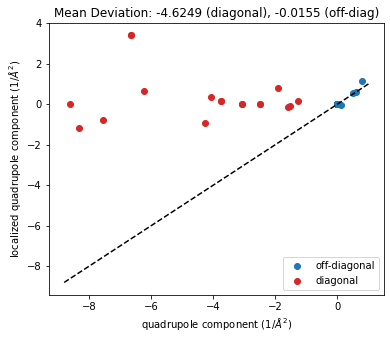

In [3]:
# square_distance = (freqs[0] - freqs[1])**2
# distance = freqs[1]-freqs[0]
# rmsd = np.sqrt(np.mean(square_distance))
# mdev = np.mean(distance)

diag_idx = np.array([])
off_idx = np.array([])
for i in range(int((len(quad.flatten()))/9)):
    diag_idx = np.append(diag_idx,np.array([0,4,8])+(i*9))
    off_idx = np.append(off_idx,np.array([1,2,5])+(i*9))

diag_diff = quad.flatten()[diag_idx.astype(int)] - quad_loc.flatten()[diag_idx.astype(int)]
off_diff = quad.flatten()[off_idx.astype(int)] - quad_loc.flatten()[off_idx.astype(int)]

diag_mdev = np.mean(diag_diff)
off_mdev = np.mean(off_diff)

fig, (ax1) = plt.subplots(1,1,figsize=(6,5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-8.8,1,10)
ax1.plot(x,x, 'k--')
ax1.scatter(quad.flatten()[off_idx.astype(int)],quad_loc.flatten()[off_idx.astype(int)],
            marker='o', label='off-diagonal')
ax1.scatter(quad.flatten()[diag_idx.astype(int)],quad_loc.flatten()[diag_idx.astype(int)],
            c='C3', marker='o', label='diagonal')
ax1.set(xlabel='quadrupole component ($\AA^2$)',
        ylabel='localized quadrupole component ($\AA^2$)')
ax1.set_title('Mean Deviation: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')

## V3

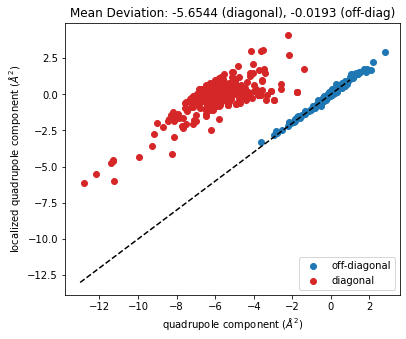

In [8]:
# square_distance = (freqs[0] - freqs[1])**2
# distance = freqs[1]-freqs[0]
# rmsd = np.sqrt(np.mean(square_distance))
# mdev = np.mean(distance)

diag_idx = np.array([])
off_idx = np.array([])
for i in range(int((len(quad_qm7.flatten()))/9)):
    diag_idx = np.append(diag_idx,np.array([0,4,8])+(i*9))
    off_idx = np.append(off_idx,np.array([1,2,5])+(i*9))

diag_diff = quad_qm7.flatten()[diag_idx.astype(int)] - quad_loc_qm7.flatten()[diag_idx.astype(int)]
off_diff = quad_qm7.flatten()[off_idx.astype(int)] - quad_loc_qm7.flatten()[off_idx.astype(int)]

diag_mdev = np.mean(diag_diff)
off_mdev = np.mean(off_diff)

fig, (ax1) = plt.subplots(1,1,figsize=(6,5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-13.,1,int((len(quad_qm7.flatten()))/9))
ax1.plot(x,x, 'k--')
ax1.scatter(quad_qm7.flatten()[off_idx.astype(int)],quad_loc_qm7.flatten()[off_idx.astype(int)],
            marker='o', label='off-diagonal')
ax1.scatter(quad_qm7.flatten()[diag_idx.astype(int)],quad_loc_qm7.flatten()[diag_idx.astype(int)],
            c='C3', marker='o', label='diagonal')
ax1.set(xlabel='quadrupole component ($\AA^2$)',
        ylabel='localized quadrupole component ($\AA^2$)')
ax1.set_title('Mean Deviation: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')
plt.savefig('figures/V3_quadrupole_benchmark_qm7', dpi=1000)

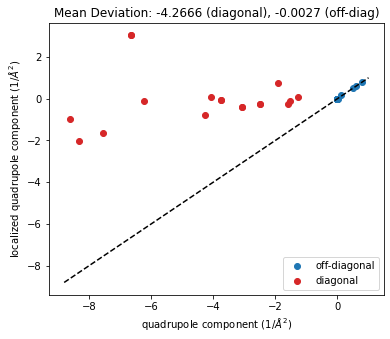

In [13]:
# square_distance = (freqs[0] - freqs[1])**2
# distance = freqs[1]-freqs[0]
# rmsd = np.sqrt(np.mean(square_distance))
# mdev = np.mean(distance)

diag_idx = np.array([])
off_idx = np.array([])
for i in range(int((len(quad.flatten()))/9)):
    diag_idx = np.append(diag_idx,np.array([0,4,8])+(i*9))
    off_idx = np.append(off_idx,np.array([1,2,5])+(i*9))

diag_diff = quad.flatten()[diag_idx.astype(int)] - quad_loc.flatten()[diag_idx.astype(int)]
off_diff = quad.flatten()[off_idx.astype(int)] - quad_loc.flatten()[off_idx.astype(int)]

diag_mdev = np.mean(diag_diff)
off_mdev = np.mean(off_diff)

fig, (ax1) = plt.subplots(1,1,figsize=(6,5))
# fig.suptitle('Mean Dev=' + str(mdev)[0:4] +' 1/cm ' + 'RMSD = ' + str(rmsd)[0:5] + ' 1/cm')
x = np.linspace(-8.8,1,10)
ax1.plot(x,x, 'k--')
ax1.scatter(quad.flatten()[off_idx.astype(int)],quad_loc.flatten()[off_idx.astype(int)],
            marker='o', label='off-diagonal')
ax1.scatter(quad.flatten()[diag_idx.astype(int)],quad_loc.flatten()[diag_idx.astype(int)],
            c='C3', marker='o', label='diagonal')
ax1.set(xlabel='quadrupole component ($\AA^2$)',
        ylabel='localized quadrupole component ($\AA^2$)')
ax1.set_title('Mean Deviation: ' + str(diag_mdev)[:7] + ' (diagonal), ' +
              str(off_mdev)[:7] + ' (off-diag)')
ax1.legend(loc='lower right')